# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import numpy as np
import geopandas as gpd
import geodatasets
import matplotlib.ticker as ticker

# Datasets

In [2]:
df1 = pd.read_csv('../datasets/cleaned_unicef_indicator_1.csv')
df2 = pd.read_csv('../datasets/cleaned_unicef_indicator_2.csv')

In [3]:
df1.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,observation_status,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Afghanistan,AF,AFG,4,Iodized salt consumption (>0 ppm) among all te...,2004,28.3,Total,Units,Percent,Reported,Middle of Fieldwork,Total
1,Afghanistan,AF,AFG,4,Iodized salt consumption (>0 ppm) among all te...,2011,54.8,Total,Units,Percent,Reanalysed,Middle of Fieldwork,Total
2,Afghanistan,AF,AFG,4,Iodized salt consumption (>0 ppm) among all te...,2015,56.6,Total,Units,Percent,Reanalysed,Middle of Fieldwork,Total
3,Albania,AL,ALB,8,Iodized salt consumption (>0 ppm) among all te...,2000,78.5,Total,Units,Percent,Reanalysed,Middle of Fieldwork,Total
4,Albania,AL,ALB,8,Iodized salt consumption (>0 ppm) among all te...,2005,97.1,Total,Units,Percent,Reanalysed,Middle of Fieldwork,Total


In [4]:
df2.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_of_measure,observation_status,current_age
0,Albania,AL,ALB,8,Percentage Children suffering exactly four dep...,2017,0.000000,Female,Percent,Unknown,Total
1,Albania,AL,ALB,8,Percentage Children suffering exactly four dep...,2017,0.000000,Male,Percent,Unknown,Total
2,Albania,AL,ALB,8,Percentage Children suffering exactly four dep...,2017,0.000000,Total,Percent,Unknown,Total
3,Algeria,DZ,DZA,12,Percentage Children suffering exactly four dep...,2012,0.018763,Female,Percent,Unknown,Total
4,Algeria,DZ,DZA,12,Percentage Children suffering exactly four dep...,2012,0.003399,Male,Percent,Unknown,Total


# Visualizations

In [5]:
world = gpd.read_file('../datasets/shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')


In [6]:
merged = world.merge(df1, how="left", left_on="NAME", right_on="country")
merged = merged.dropna(subset=['obs_value'])

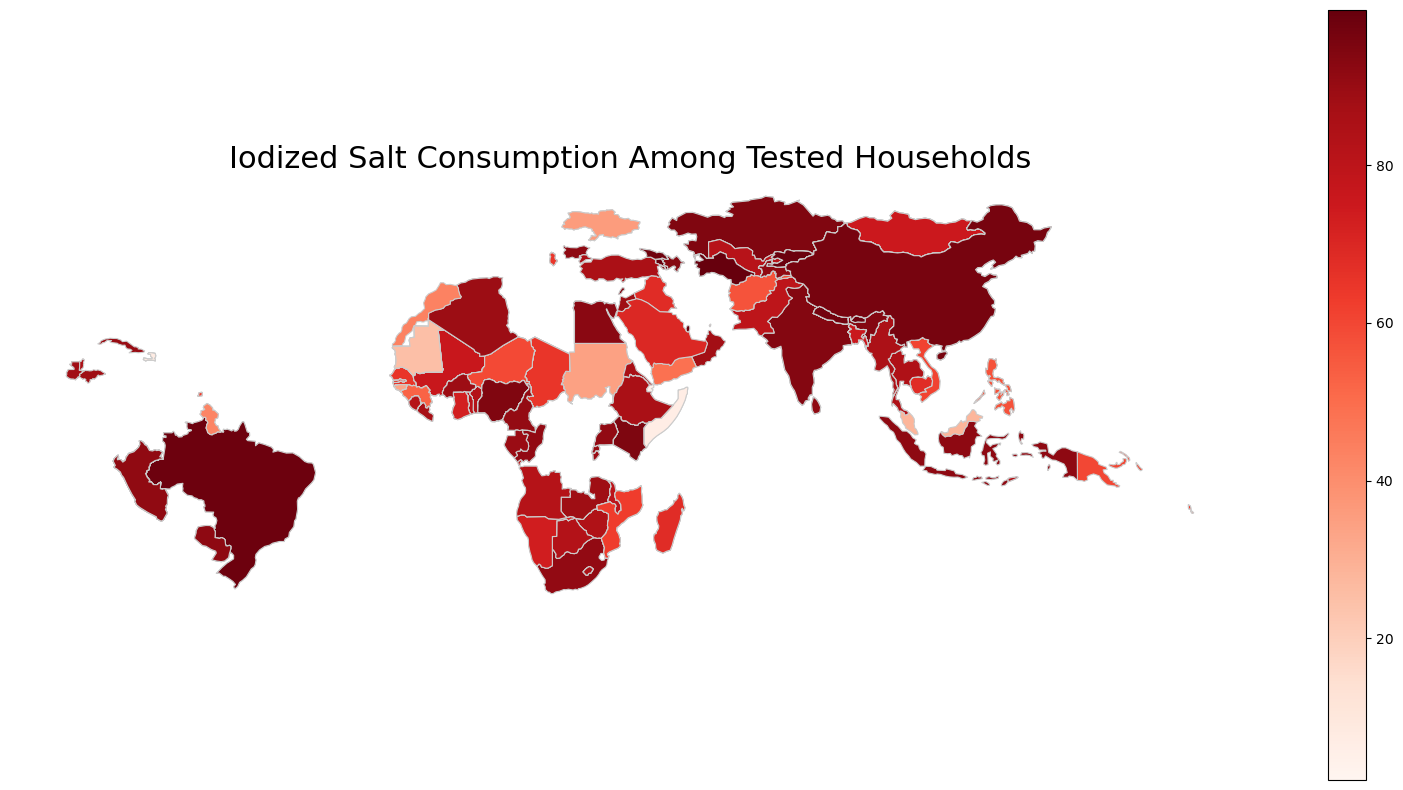

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

merged.plot(
    column='obs_value',          
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values"
    }
)

ax.set_title('Iodized Salt Consumption Among Tested Households', fontdict={'fontsize': 22})
ax.axis('off')

plt.show()

---

In [8]:
age_groups = ['1-3 years', '4-6 years', '7-10 years', 
              '11-18 years girls', '11-18 years boys', 'Pregnant and Breastfeeding women']
iodine_amount = [70, 100, 110, 130, 140, 200]
colors = ['gold', 'skyblue', 'limegreen', 'crimson', 'navy', 'darkorange']


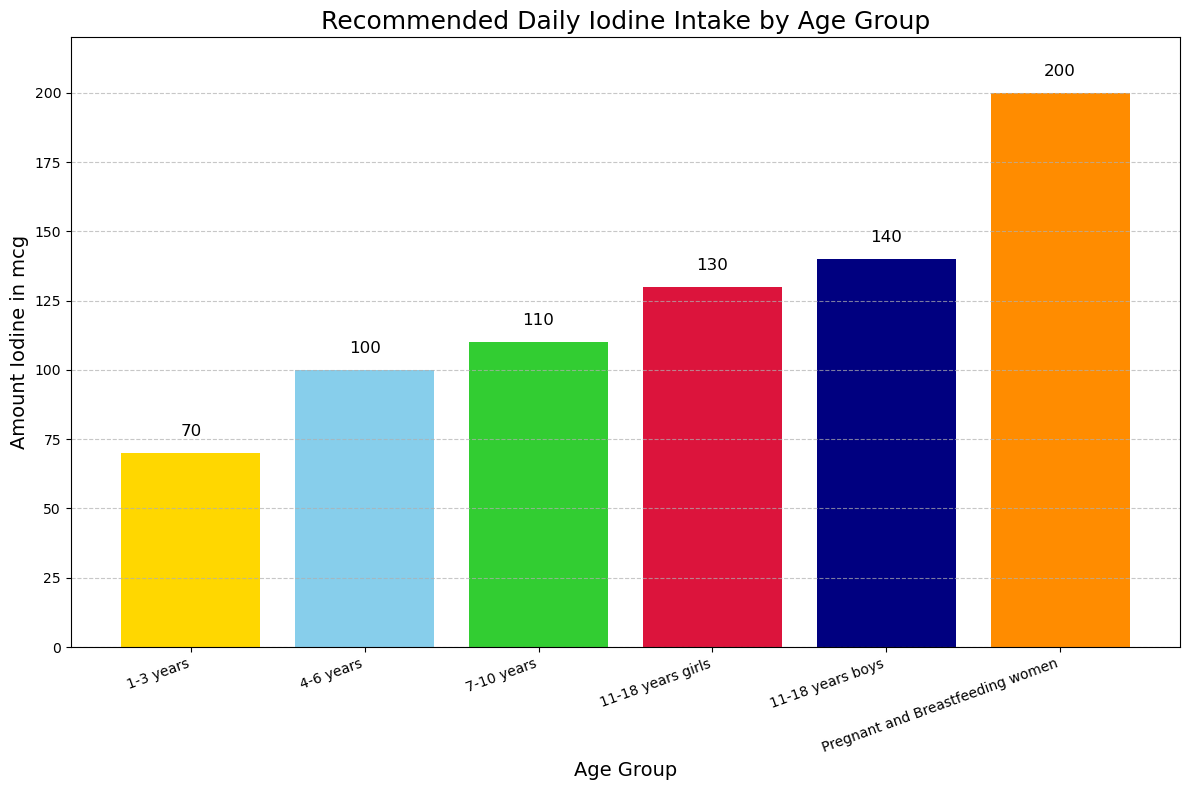

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(age_groups, iodine_amount, color=colors)

# Labels and Title
ax.set_ylabel('Amount Iodine in mcg', fontsize=14)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_title('Recommended Daily Iodine Intake by Age Group', fontsize=18)
ax.set_ylim(0, 220)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=12)

# Rotate x-labels
plt.xticks(rotation=20, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

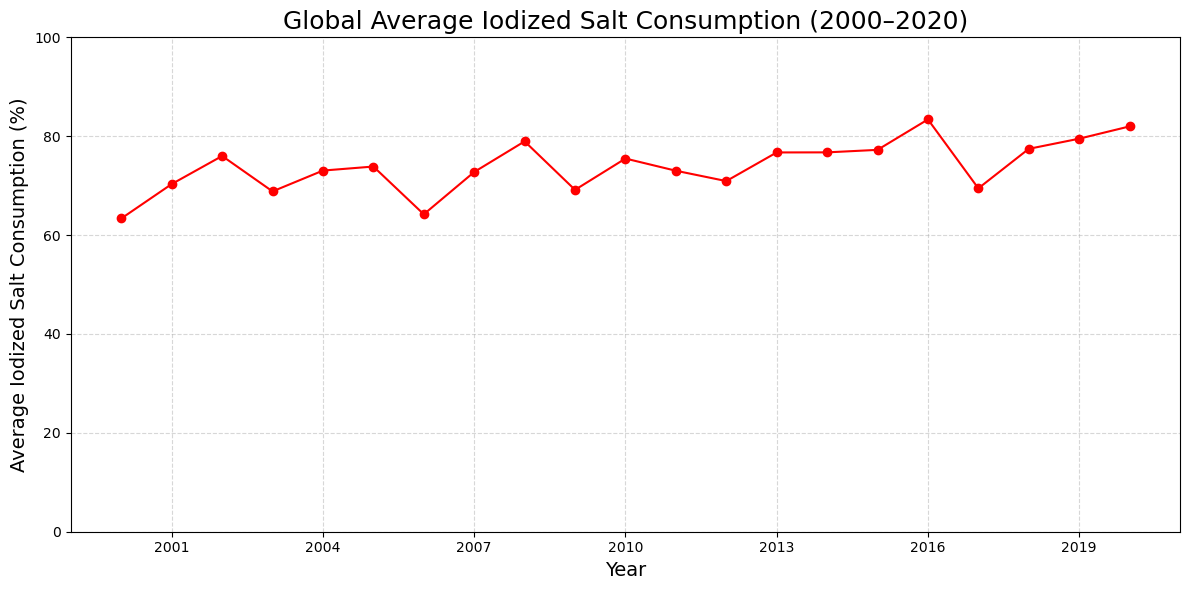

In [10]:
df_avg = df1.groupby('time_period')['obs_value'].mean().reset_index()
df_avg['time_period'] = pd.to_numeric(df_avg['time_period'], errors='coerce')

# Filter year range
df_avg = df_avg[(df_avg['time_period'] >= 2000) & (df_avg['time_period'] <= 2020)]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_avg['time_period'], df_avg['obs_value'], marker='o', linestyle='-', color='red')

# Labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average Iodized Salt Consumption (%)', fontsize=14)
ax.set_title('Global Average Iodized Salt Consumption (2000–2020)', fontsize=18)
ax.set_ylim(0, 100)
ax.grid(True, linestyle='--', alpha=0.5)

# 🛠 This fixes the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [11]:
df1 = df1.dropna(subset=['obs_value'])
df1['time_period'] = pd.to_numeric(df1['time_period'], errors='coerce')

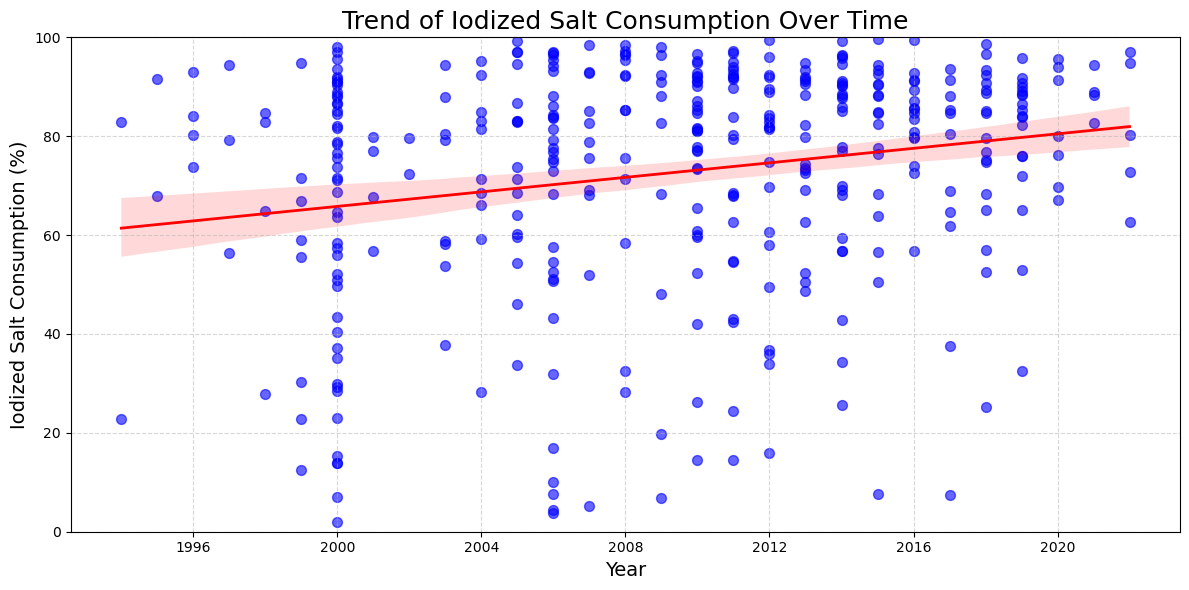

In [12]:
ig, ax = plt.subplots(figsize=(12, 6))


sns.regplot(
    data=df1,
    x='time_period',
    y='obs_value',
    scatter_kws={'s': 50, 'color': 'blue', 'alpha': 0.6},
    line_kws={'color': 'red', 'linewidth': 2},
    ax=ax
)

# Labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Iodized Salt Consumption (%)', fontsize=14)
ax.set_title('Trend of Iodized Salt Consumption Over Time', fontsize=18)
ax.set_ylim(0, 100)
ax.grid(True, linestyle='--', alpha=0.5)

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()